## *Importing Libraries and Dataset*

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
data = pd.read_csv("Fuel_cell_performance.csv")

## *Data PreProcessing*

In [57]:
data.drop(columns=["Target1","Target2","Target3","Target4"], inplace = True)

In [58]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,52.32


In [59]:
print(data.isnull().sum())

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
Target5    0
dtype: int64


In [60]:
scaledData = RobustScaler().fit_transform(data)  
dataF = pd.DataFrame(scaledData, columns=data.columns)

In [61]:
dataF.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target5
0,-0.224390,-0.686275,-0.446870,0.393376,0.139555,-0.189691,0.231648,-0.915985,-0.115819,-0.941980,-0.360164,0.853333,-0.764038,-0.966581,-0.559360,-0.225832
1,0.904065,0.088235,-0.455604,0.644672,0.665446,0.024742,-0.603589,-0.604975,-0.223164,-0.518771,0.443111,0.146667,-0.020330,0.082262,0.830292,-0.203434
2,0.439024,0.676471,0.854440,-0.467198,0.572240,0.577320,0.792822,0.726039,0.240113,0.860068,-0.379081,-0.133333,0.508833,-0.884319,0.774306,1.551020
3,0.188618,0.539216,-0.475983,0.291240,-0.694746,-0.395876,0.218597,0.534702,0.533898,0.696246,0.581719,0.906667,-0.708971,0.699229,-0.785304,2.612985
4,-0.656911,0.539216,-0.441048,0.181014,-0.694367,0.800000,-0.629690,-0.269612,-0.138418,0.423208,-0.659573,-0.400000,0.476660,0.226221,-0.712322,0.126429


## *Linear Regression*

In [62]:
X = dataF.drop(columns=["Target5"])
y = dataF["Target5"]
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

               Metric     Value
0  Mean Squared Error  0.213253
1           R-squared  0.694349


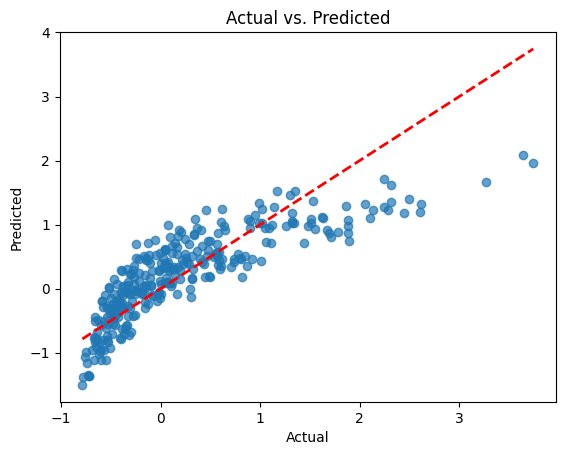

In [63]:
linear = LinearRegression()
linear.fit(Xtrain, yTrain)
yPred = linear.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred, alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


## *KNN Regressor*

               Metric     Value
0  Mean Squared Error  0.313699
1           R-squared  0.550381


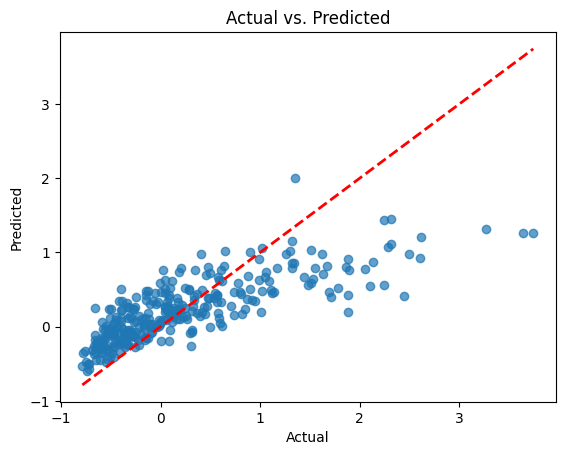

In [64]:
knnRegressor = KNeighborsRegressor(n_neighbors=10, weights='uniform', metric='minkowski', p=2)
knnRegressor.fit(Xtrain, yTrain)
yPred = knnRegressor.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred, alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


## *Support Vector Regressor (Radial Basis Function)*

               Metric     Value
0  Mean Squared Error  0.184717
1           R-squared  0.735249


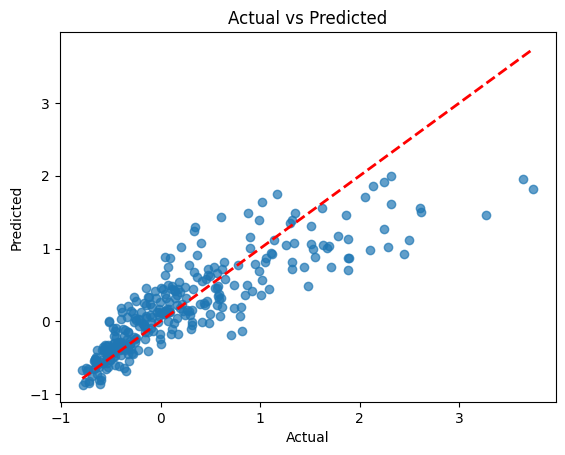

In [65]:
svmRegressor = SVR(kernel='rbf')  
svmRegressor.fit(Xtrain, yTrain)
yPred = svmRegressor.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred, alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red',linestyle='--', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## *Support Vector Regressor (Sigmoid Function)*

               Metric     Value
0  Mean Squared Error  0.480308
1           R-squared  0.311583


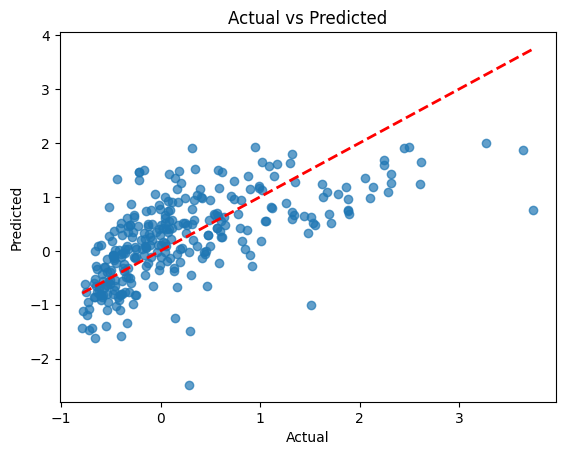

In [66]:
svmRegressor = SVR(kernel='sigmoid')  
svmRegressor.fit(Xtrain, yTrain)
yPred = svmRegressor.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred,alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red', linestyle = '--', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## *Decision Tree Regressor*

In [67]:
#Scaling is not required for tree-based models, so we use the original dataset in this case
X = data.drop(columns=["Target5"])
y = data["Target5"]
Xtrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)


               Metric       Value
0  Mean Squared Error  878.501322
1           R-squared    0.568556


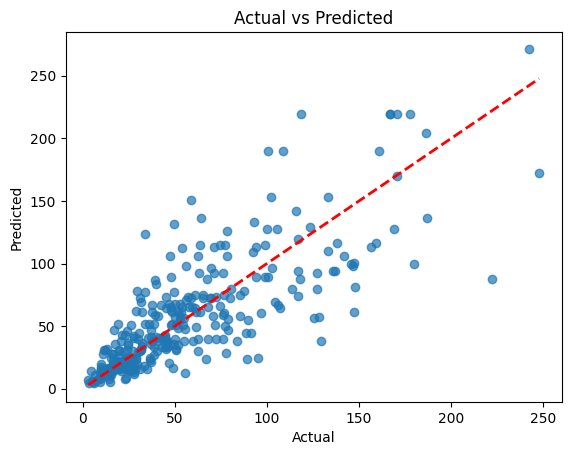

In [68]:
dtRegressor = DecisionTreeRegressor(max_depth=10, random_state=42)  
dtRegressor.fit(Xtrain, yTrain)
yPred = dtRegressor.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred,alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red', linestyle = '--', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## *Random Forest Regressor*

               Metric       Value
0  Mean Squared Error  442.160780
1           R-squared    0.782849


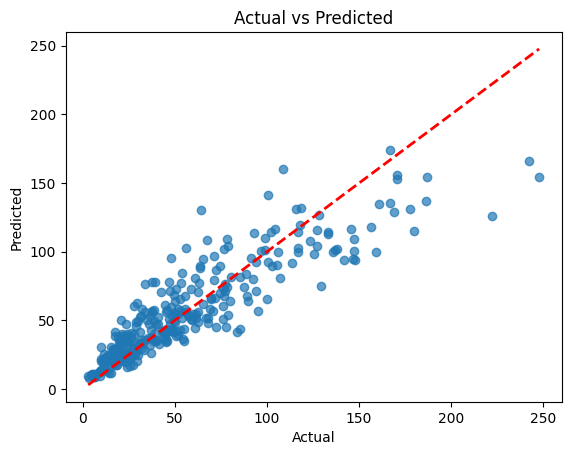

In [69]:
forest = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
forest.fit(Xtrain, yTrain)
yPred = forest.predict(Xtest)

mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

results = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'Value': [mse, r2]
})

print(results)

plt.scatter(yTest, yPred,alpha=0.7)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], color='red', linestyle = '--', lw=2)  
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
